In [1]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas

from matplotlib import pylab as plt  # Matplotlib

# matplotlibで日本語表示する為の指定
import japanize_matplotlib

In [2]:
# プロ野球選手
baseball = pd.read_csv('../../9_data/プロ野球/プロ野球選手身長体重.csv')

In [3]:
cov_mtrx = np.cov(baseball['身長'], baseball['体重'])

In [4]:
cov_mtrx_inv = np.array([
    [cov_mtrx[1][1], -cov_mtrx[0][1]],
    [-cov_mtrx[1][0], cov_mtrx[0][0]]
]) / (cov_mtrx[0][0] * cov_mtrx[1][1] - cov_mtrx[0][1] * cov_mtrx[1][0])

In [5]:
def mahal(x, y, cov_mtrx_inv):
    """
    マハラノビス距離
    :param x: x
    :param y: y
    :return: マハラノビス距離
    """
    return np.sqrt((x - y).dot(cov_mtrx_inv).dot((x - y).T))

In [6]:
# 野球選手の平均身長と平均体重を求める
from scipy.spatial.distance import euclidean

a = np.array([180, 110])
b = np.array([200, 110])
avg = np.array([np.mean(baseball['身長']), np.mean(baseball['体重'])])
pd.DataFrame([[euclidean(avg, a), mahal(avg, a, cov_mtrx_inv)],
              [euclidean(avg, b), mahal(avg, b, cov_mtrx_inv)]],
             index=['選手A', '選手B'], columns=['ユーグリッド距離', 'マハラノビス距離'])

,ユーグリッド距離,マハラノビス距離
選手A,26.053352,3.741083
選手B,32.412240,3.551571


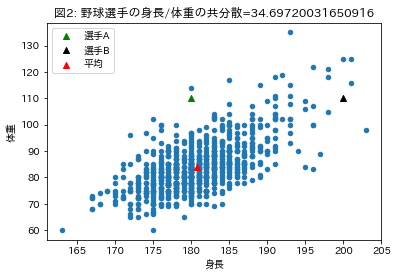

In [7]:
baseball_cov = np.cov(baseball['身長'], baseball['体重'])[0][1]
baseball.plot(kind='scatter', x='身長', y='体重',
              title='図2: 野球選手の身長/体重の共分散={0}'.format(baseball_cov))
plt.scatter(*a, c='g', marker='^', label='選手A')
plt.scatter(b[0], b[1], c='k', marker='^', label='選手B')
plt.scatter(avg[0], avg[1], c='r', marker='^', label='平均')
plt.legend()

In [8]:
from scipy.spatial.distance import mahalanobis

pd.DataFrame([[mahal(avg, a, cov_mtrx_inv)],
              [mahalanobis(avg, a, np.linalg.inv(cov_mtrx))]],
             index=['独自関数', 'scipy.spatial.distance.mahalanobis'], columns=['マハラノビス距離'])

,マハラノビス距離
独自関数,3.741083
scipy.spatial.distance.mahalanobis,3.741083


In [9]:
# 東京, 仙台, 名古屋の座標
tokyo = [35.709 * 111, 139.732 * 91]
nagoya = [35.181 * 111, 136.906 * 91]
sendai = [38.254 * 111, 140.891 * 91]

In [10]:
# 正解例
from scipy.spatial.distance import mahalanobis

cov_mtrx = np.cov([tokyo[0], nagoya[0], sendai[0]], [tokyo[1], nagoya[1], sendai[1]])
pd.DataFrame([[mahalanobis(tokyo, sendai, np.linalg.inv(cov_mtrx))],
              [mahalanobis(tokyo, nagoya, np.linalg.inv(cov_mtrx))]],
             index=['東京-仙台', '東京-名古屋'], columns=['マハラノビス距離'])

,マハラノビス距離
東京-仙台,2.0
東京-名古屋,2.0
